In [181]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics


In [13]:
test_data=pd.read_csv('/Users/jinglinhui/Desktop/Data_analytics_project/log_regression/test.csv')
train_data=pd.read_csv('/Users/jinglinhui/Desktop/Data_analytics_project/log_regression/train.csv')

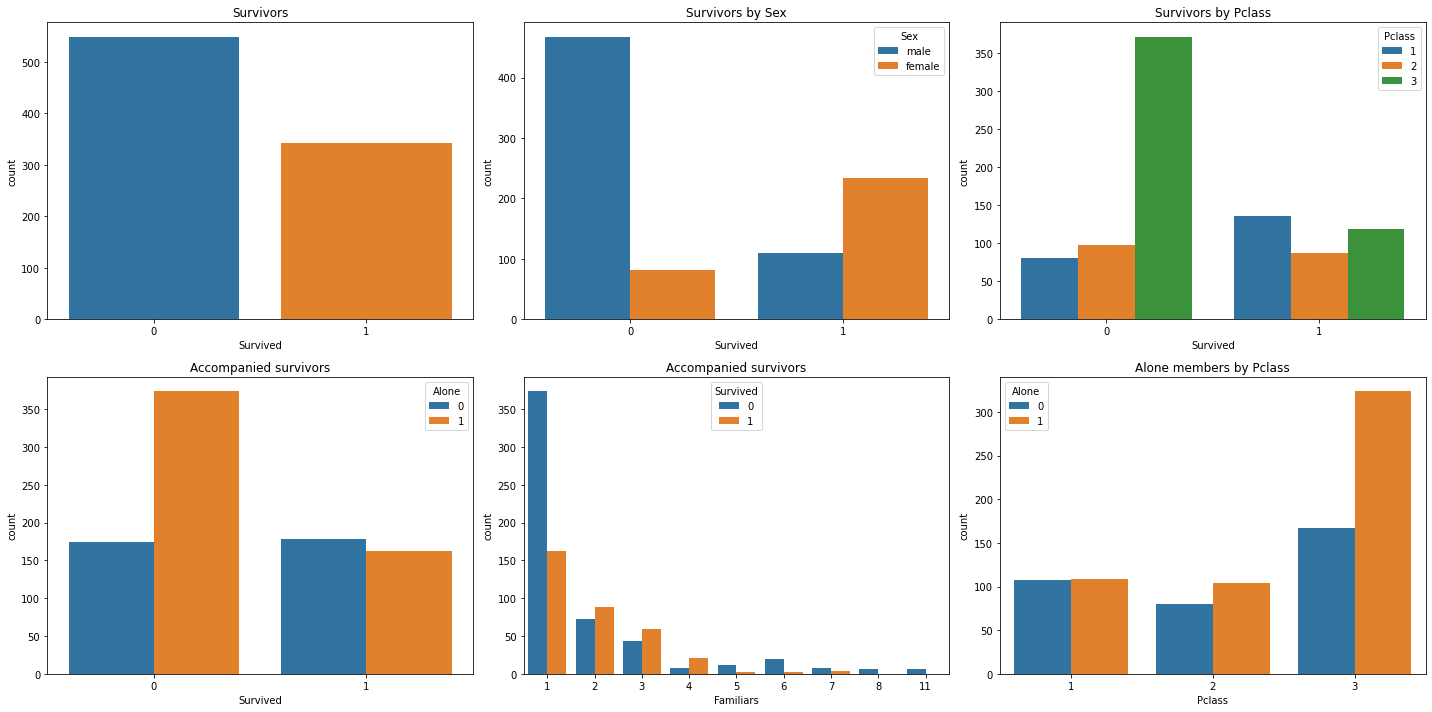

In [14]:
def create_alone_feature(SibSp_Parch):
    if (SibSp_Parch[0]+SibSp_Parch[1])==0:
        return 1
    else:
        return 0
 
train_data['Alone'] = train_data[['SibSp','Parch']].apply(create_alone_feature, axis=1)
train_data['Familiars'] = 1 + train_data['SibSp'] + train_data['Parch']

test_data['Alone'] = test_data[['SibSp','Parch']].apply(create_alone_feature, axis=1)
test_data['Familiars'] = 1 + test_data['SibSp'] + test_data['Parch']

fig, axx = plt.subplots(2, 3, figsize=(20,10))
axx[0,0].set_title('Survivors')
sns.countplot(x='Survived', data=train_data, ax=axx[0,0])
axx[0,1].set_title('Survivors by Sex')
sns.countplot(x='Survived', hue='Sex', data=train_data, ax=axx[0,1])
axx[0,2].set_title('Survivors by Pclass')
sns.countplot(x='Survived', hue='Pclass', data=train_data, ax=axx[0,2])
axx[1,0].set_title('Accompanied survivors')
sns.countplot(x='Survived', hue='Alone', data=train_data, ax=axx[1,0])
axx[1,1].set_title('Accompanied survivors')
sns.countplot(x='Familiars', hue='Survived', data=train_data, ax=axx[1,1])
axx[1,2].set_title('Alone members by Pclass')
sns.countplot(x='Pclass', hue='Alone', data=train_data, ax=axx[1,2])
plt.tight_layout()

In [15]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Familiars
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1


In [16]:
train_data = train_data.drop(['PassengerId'], axis=1)

In [17]:
train_data['Age'] = train_data.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean()))
train_data["Embarked"].fillna(train_data['Embarked'].value_counts().idxmax(), inplace=True)

In [18]:
train_data["Sex"] = train_data["Sex"].map({'male':1, 'female':0})
embarked =pd.get_dummies(train_data['Embarked'],drop_first=True)
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Familiars
0,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.2500,NaN,S,0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.2833,C85,C,0,2
2,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.1000,C123,S,0,2
4,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.00,0,0,211536,13.0000,NaN,S,1,1
887,1,1,"Graham, Miss. Margaret Edith",0,19.00,0,0,112053,30.0000,B42,S,1,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.75,1,2,W./C. 6607,23.4500,NaN,S,0,4
889,1,1,"Behr, Mr. Karl Howell",1,26.00,0,0,111369,30.0000,C148,C,1,1


In [19]:
train_data = pd.concat([train_data, embarked], axis=1)

In [20]:
train_data.drop('Cabin', axis=1, inplace=True)
train_data.drop("Name", inplace=True, axis=1)
train_data.drop("Ticket", inplace=True, axis=1)
train_data.drop("Embarked", inplace=True, axis=1)
train_data.drop("SibSp", inplace=True, axis=1)
train_data.drop("Parch", inplace=True, axis=1)

In [21]:
train_data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Alone        0
Familiars    0
Q            0
S            0
dtype: int64

In [22]:
test_data['Age'] = test_data.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean()))
test_data["Embarked"].fillna(test_data['Embarked'].value_counts().idxmax(), inplace=True)
test_data["Sex"] = test_data["Sex"].map({'male':1, 'female':0})
embarked_test = pd.get_dummies(test_data["Embarked"], drop_first=True)
test_data = pd.concat([test_data, embarked_test], axis=1)

In [24]:
test_data = test_data.drop(['PassengerId'], axis=1)
test_data.drop('Cabin', axis=1, inplace=True)
test_data.drop("Name", inplace=True, axis=1)
test_data.drop("Ticket", inplace=True, axis=1)
test_data.drop("Embarked", inplace=True, axis=1)
test_data.drop("SibSp", inplace=True, axis=1)
test_data.drop("Parch", inplace=True, axis=1)

In [227]:
test_data["Fare"].fillna(test_data["Fare"].mean(skipna=True), inplace=True)

In [228]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age          0
Fare         0
Alone        0
Familiars    0
Q            0
S            0
dtype: int64

In [28]:
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Alone,Familiars,Q,S
0,0,3,1,22.000000,7.2500,0,2,0,1
1,1,1,0,38.000000,71.2833,0,2,0,0
2,1,3,0,26.000000,7.9250,1,1,0,1
3,1,1,0,35.000000,53.1000,0,2,0,1
4,0,3,1,35.000000,8.0500,1,1,0,1
5,0,3,1,26.507589,8.4583,1,1,1,0
6,0,1,1,54.000000,51.8625,1,1,0,1
7,0,3,1,2.000000,21.0750,0,5,0,1
8,1,3,0,27.000000,11.1333,0,3,0,1
9,1,2,0,14.000000,30.0708,0,2,0,0


In [134]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]

In [145]:
def cross_validation_split(dataset, folds):
        dataset_split = []
        fold_size = int(X_train.shape[0] / folds) #number of rows in each fold
        ini_index=[0] #start from index 0
        remains= fold_size % folds 
        
        
        # for loop to save each fold
        for i in range(1,remains):
            ini_index.append(i*fold_size+1)

        for j in range (remains, folds+1):
            ini_index.append(j*fold_size+remains)

            # save the fold     
        for n in range(len(ini_index)-1):
            dataset_split.append([ini_index[n], ini_index[n+1]])
            
        return dataset_split 


In [146]:
index=cross_validation_split(X_train,10)
index

[[0, 90],
 [90, 179],
 [179, 268],
 [268, 357],
 [357, 446],
 [446, 535],
 [535, 624],
 [624, 713],
 [713, 810],
 [810, 899]]

In [197]:
def cross_validation(model, X_train, Y_train, k):
    index=cross_validation_split(X_train,k)
    
    # train each sub-combination
    auc = []
    for i in range(k):
        
        cv_xtest = X_train.iloc[index[i][0]:index[i][1],:]
        cv_ytest = Y_train.iloc[index[i][0]:index[i][1],]
        
        # drop the test sub-set
        cv_xtrain = X_train.drop(X_train.index[index[i][0]:index[i][1]])
        cv_ytrain = Y_train.drop(X_train.index[index[i][0]:index[i][1]])
        
        model.fit(cv_xtrain, cv_ytrain.values.reshape(-1))
        
        # calculate the auc as the evaluation metric
        fpr, tpr, threshold = roc_curve(cv_ytest, model.predict_proba(cv_xtest)[:,1])
        auc_roc = metrics.auc(fpr, tpr)
        auc.append(auc_roc)
    
    return np.mean(auc)

In [198]:
param_grid = {'n_estimators': [50, 100, 200],
              'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 5, 10],
              'max_features': ['auto', 'sqrt','log2'],
             }

In [202]:
#create a dictionery for parameters
import itertools as it
parameters = it.product(*(param_grid[title] for title in list(param_grid)))
print(list(param_grid))

['n_estimators', 'criterion', 'max_depth', 'max_features']


In [203]:
for i in list(parameters):
    rf = RandomForestClassifier(n_estimators = i[0], 
                                    criterion=i[1], 
                                    max_depth = i[2],   
                                    max_features = i[3],
                                    )
    auc_average = cross_validation(rf, X_train, Y_train, 10)
    score = 0
    if auc_average >= score:
        score = auc_average
        optimal_param = i       
print(score, optimal_param)

0.8708556253169599 (200, 'entropy', 10, 'log2')


In [204]:
clf = RandomForestClassifier(n_estimators=200,criterion='entropy', max_depth=10, max_features='log2')
clf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=200)

In [218]:
y_pred=clf.predict(X_train)
ypreds_proba = clf.predict_proba(X_train)

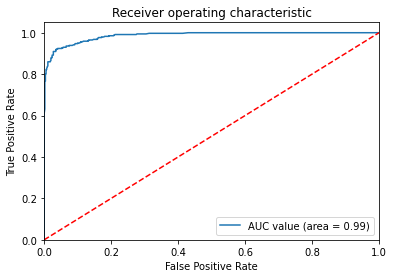

In [219]:
[fpr, tpr, thr]= roc_curve(Y_train,ypreds_proba[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='AUC value (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [222]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Model accuracy is %2.3f" % accuracy_score(Y_train, y_pred))

Model accuracy is 0.939


Text(0.5, 1.05, 'confusion matrix')

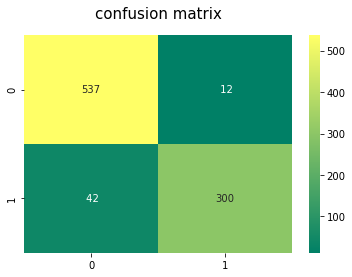

In [223]:
cm = confusion_matrix(Y_train,y_pred)
sns.heatmap(confusion_matrix(Y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('confusion matrix', y=1.05, size=15)

In [294]:
test_pred=clf.predict(test_data)
test_predprob=clf.predict_proba(test_data)

In [295]:
predict_survived = pd.DataFrame({'Survived':test_predprob[:,1],
                             'NotSurvived' : test_predprob[:,0]}
                            )
predict_survived

,Survived,NotSurvived
0,0.031602,0.968398
1,0.267308,0.732692
2,0.126870,0.873130
3,0.287876,0.712124
4,0.621596,0.378404
...,...,...
413,0.059948,0.940052
414,0.995000,0.005000
415,0.033652,0.966348
416,0.059948,0.940052


In [296]:
def filter_prob(p):
    if p['Survived'] > 0.55:
        return "1"
    else:
        return "0"

In [297]:
predict_survived['Survived_predict']= predict_survived.apply(filter_prob,axis=1)

In [298]:
predict_survived['Survived_actual']=Y_train

In [299]:
predict_survived

,Survived,NotSurvived,Survived_predict,Survived_actual
0,0.031602,0.968398,0,0
1,0.267308,0.732692,0,1
2,0.126870,0.873130,0,1
3,0.287876,0.712124,0,1
4,0.621596,0.378404,1,0
...,...,...,...,...
413,0.059948,0.940052,0,0
414,0.995000,0.005000,1,1
415,0.033652,0.966348,0,0
416,0.059948,0.940052,0,1


In [282]:
rf.feature_importances_

array([0.09450001, 0.26687991, 0.25684182, 0.25666799, 0.01570011,
       0.07299227, 0.0125392 , 0.02387869])

<BarContainer object of 8 artists>

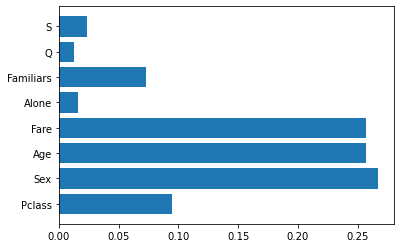

In [285]:
plt.barh(X_train.columns, rf.feature_importances_)

In [289]:
feature_importance = pd.DataFrame({'feature':X_train.columns,
                                   'importance':rf.feature_importances_})
feature_importance

,feature,importance
0,Pclass,0.094500
1,Sex,0.266880
2,Age,0.256842
3,Fare,0.256668
4,Alone,0.015700
5,Familiars,0.072992
6,Q,0.012539
7,S,0.023879
